# ManyCores exercises

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from matplotlib import rcParams
import itertools
%matplotlib inline

from IPython.display import display

In [2]:
def csv_parse(path, header=False, sep=";"):
    if header:
        df = pd.read_csv(path, sep=sep, names=header)
    else:
        df = pd.read_csv(path, sep=sep)
    #display(df.head())
    return df

def load_glob(glob, concat=True):
    liste = [pd.read_csv(file) for file in glob]
    name = [file for file in glob]
    repr(name)
    if concat:
        return pd.concat(liste)
    return liste, name

In [3]:
def transform_to_ms(df, cols):
    return df[cols]*1e3


# Ex9.1

In [6]:
# Get the data
cwd = pathlib.Path(os.getcwd())
data_subdir = cwd.parent / "data"
plot_dir = cwd / "out"
data_subdir, plot_dir

(PosixPath('/Users/peterholzner/Code/many_cores/ex9/data'),
 PosixPath('/Users/peterholzner/Code/many_cores/ex9/plots/out'))

In [27]:
def drop_cols(df):
    to_drop = [x for x in df.columns if x not in ["N", "runtime"]]
    return df.drop(to_drop, axis="columns")

test = drop_cols(df_ocl)
test.insert(1, column="k", value=ks)
test

,N,k,runtime
0,10,1,0.000078
1,100,2,0.000063
2,1000,3,0.000078
3,10000,4,0.000073
4,100000,5,0.000105
5,1000000,6,0.000408
6,10000000,7,0.000697


In [28]:
df_omp = csv_parse(data_subdir / "ph_data_omp.csv")
ks = df_omp["k"]

df_ocl = csv_parse(data_subdir / "ph_data_mykernel_ocl.csv")
df_ocl = df_ocl.rename(columns={"dot_time": "runtime"})
df_ocl = drop_cols(df_ocl)
df_ocl.insert(1, column="k", value=ks)

df_cuda = csv_parse(data_subdir / "ph_data_mykernel_cuda.csv")
df_cuda = df_cuda.rename(columns={"dot_time": "runtime"})
df_cuda = drop_cols(df_cuda)
df_cuda.insert(1, column="k", value=ks)

In [37]:
df = df_omp.rename(columns={"runtime": "OMP"})
df = df.join(df_ocl["runtime"]).rename(columns={"runtime": "OpenCL"})
df = df.join(df_cuda["runtime"]).rename(columns={"runtime": "CUDA"})
df_runtime = df
del df
df_runtime

,N,k,OMP,OpenCL,CUDA
0,10,1,0.005162,0.000078,0.000115
1,100,2,0.006683,0.000063,0.000118
2,1000,3,0.006740,0.000078,0.000118
3,10000,4,0.005775,0.000073,0.000118
4,100000,5,0.006782,0.000105,0.000149
5,1000000,6,0.012523,0.000408,0.000147
6,10000000,7,0.051871,0.000697,0.000210


In [44]:
df_speedup = df_runtime.copy()
df_speedup["OpenCL"] = df_speedup["OMP"] / df_speedup["OpenCL"]
df_speedup["CUDA"] = df_speedup["OMP"] / df_speedup["CUDA"] 
df_speedup

,N,k,OMP,OpenCL,CUDA
0,10,1,0.005162,66.179487,44.886957
1,100,2,0.006683,106.079365,56.635593
2,1000,3,0.006740,86.410256,57.118644
3,10000,4,0.005775,79.109589,48.940678
4,100000,5,0.006782,64.590476,45.516779
5,1000000,6,0.012523,30.693627,85.190476
6,10000000,7,0.051871,74.420373,247.004762


In [4]:
def print_styling():

    plt.rc('figure', figsize=(12,8)) 
    plt.style.use("seaborn")
    sns.set_palette("Paired")
    SMALL_SIZE = 15
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 26

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('lines', linewidth=2)

    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
print_styling()

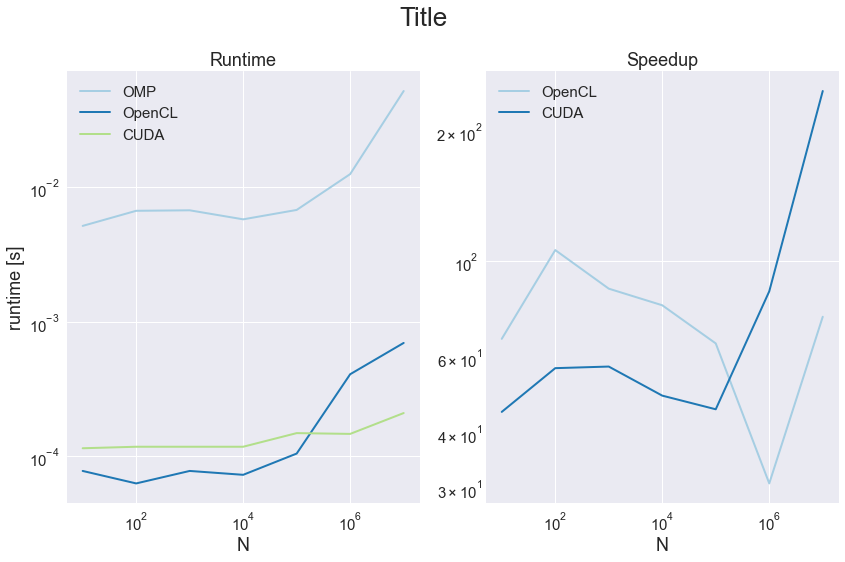

In [51]:
fig, axs = plt.subplots(ncols=2, figsize=(12,8))
print_styling()
axs = axs.ravel()
axL = axs[0]
axR = axs[1]

logx, logy = True, True
if (logx and logy):
    plot_format = "loglog"
if (logx and not logy):
    plot_format = "logx"
if (not logx and logy):
    plot_format = "logy"
else:
    plot_format = "linear"

df_runtime.plot(x="N", y=["OMP", "OpenCL", "CUDA"], ax=axL, logx=logx, logy=logy)
df_speedup.plot(x="N", y=["OpenCL", "CUDA"], ax=axR, logx=logx, logy=logy)

axL.set_ylabel("runtime [s]")

axL.set_title("Runtime")
axR.set_title("Speedup")

plt.suptitle("Title")
plt.tight_layout()
fig.savefig(plot_dir / "omp_vs_cuda_vs_opencl.pdf", bbox_inches="tight", pad_inches=0.2)